In [26]:
%load_ext autoreload
%autoreload 10
%matplotlib inline
from ANN_simulation import *
from pybrain.structure.modules.circularlayer import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# try new layer in Pybrain

my_node_num = [2, 7, 4, 7, 2]
network_parameters = [0.002, 0.4, 0.1, 1]

radius_1 = 1
radius_2 = 0.5

angle_range_1 = np.arange(0, 2 * pi, 0.1)
angle_range_2 = np.arange(0, 2 * pi, 0.1)

direct_prod = list(itertools.product(angle_range_1, angle_range_2))


data_for_training = [[radius_1 * cos(angle[0]) + radius_2 * cos(angle[1]), \
                      radius_1 * sin(angle[0]) + radius_2 * sin(angle[1])]\
                     for angle in direct_prod]
data_for_training = data_for_training



a = neural_network_for_simulation(index=1,node_num = my_node_num, data_set_for_training = data_for_training, 
                                  training_data_interval=1,max_num_of_training=20,
                                  hidden_layers_types = [TanhLayer, CircularLayer, TanhLayer],
                                  network_parameters=network_parameters)


a.train()
# a = pickle.load(open('temp.pkl','rb'))

a.save_into_file(filename="temp.pkl")


start training network with index = 1

Done training network with index = 1



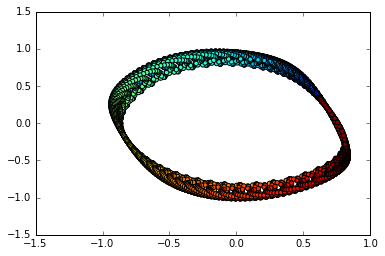

In [8]:
mid_res = a.get_mid_result(data_for_training)

mid_result_1 = [item[1] for item in mid_res]
mid_result_3 = [item[3] for item in mid_res]
[x, y] = zip(*mid_result_3)

ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

fig, ax = plt.subplots()
# (x,y) = zip(*data_for_training)
[x, y] = zip(*mid_result_3)
ax.scatter(x,y, c=range(len(x)))

# ax.set_title("plotting of the input data (r_1=10, r_2=9.5)")

# ax.scatter(angle_range_2, ml_angles_1[::63], c='red')
# ax.set_title("extracted angle vs. input angle \n(input: a semi-circle with radius=10)")
# ax.set_ylabel("extracted angle in the hidden circular layer")
# ax.set_xlabel("input angle")
# ax.set_xlim([])

In [ ]:
# this is the case for tanh layer

my_node_num = [2, 6, 3, 6, 2]
network_parameters = [0.002, 0.4, 0.1, 1]

radius_1 = 10
radius_2 = 5

angle_range_1 = np.arange(0, 2 * pi, 0.1)
angle_range_2 = np.arange(0, 2 * pi, 0.1)

direct_prod = list(itertools.product(angle_range_1, angle_range_2))


data_for_training = [[radius_1 * cos(angle[0]) + radius_2 * cos(angle[1]), \
                      radius_1 * sin(angle[0]) + radius_2 * sin(angle[1])]\
                     for angle in direct_prod]


a = neural_network_for_simulation(index=1,node_num = my_node_num, data_set_for_training = data_for_training, 
                                  training_data_interval=1,max_num_of_training=20,
                                  hidden_layers_types = [TanhLayer, TanhLayer, TanhLayer],
                                  network_parameters=network_parameters)


a.train()
# a = pickle.load(open('temp.pkl','rb'))

a.save_into_file(filename="temp.pkl")

mid_res = a.get_mid_result(data_for_training)

mid_result_1 = [item[1] for item in mid_res]
mid_result_3 = [item[3] for item in mid_res]
[x, y] = zip(*mid_result_3)

# ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
# ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

In [ ]:
fig, ax = plt.subplots()
# (x,y) = zip(*data_for_training)
[x, y] = zip(*mid_result_3)
ax.scatter(x,y, c=range(len(x)))

# ax.set_title("plotting of the input data (r_1=10, r_2=9.5)")

# ax.scatter(angle_range_2, ml_angles_1[::63], c='red')
# ax.set_title("extracted angle vs. input angle \n(input: a semi-circle with radius=10)")
# ax.set_ylabel("extracted angle in the hidden circular layer")
# ax.set_xlabel("input angle")
# ax.set_xlim([])

start training network with index = 1, training maxEpochs = 0

Done training network with index = 1, training maxEpochs = 0



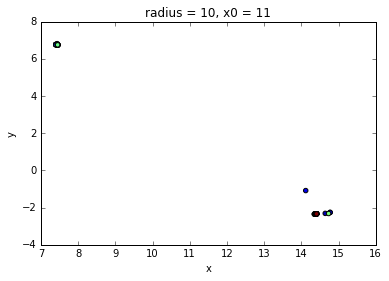

In [2]:
# try circular layer on a circle whose center is not at origin

my_node_num = [2, 6, 4, 6, 2]
network_parameters = [0.02, 0.4, 0.1, 1]

# my_radius_x0_list = [[10, 9], [10, 11],
#                      [1, 0.9], [1, 1.1],
#                      [0.1, 0.09], [0.1, 0.11]
#                     ]
my_radius_x0_list = [[10,11]]

index = 0

for radius_1, x0 in my_radius_x0_list:

    angle_range_1 = np.arange(0, 2 * pi, 0.1)

    data_for_training = [[x0 + radius_1 * cos(theta), radius_1 * sin(theta)] for theta in angle_range_1]


    a = neural_network_for_simulation(index=1,node_num = my_node_num, data_set_for_training = data_for_training, 
                                      training_data_interval=1,max_num_of_training=0,
                                      hidden_layers_types = [TanhLayer, CircularLayer, TanhLayer],
                                      network_parameters=network_parameters)


    a.train()
    # a = pickle.load(open('temp.pkl','rb'))

    a.save_into_file(filename="temp.pkl")

    mid_res = a.get_mid_result(data_for_training)

    mid_result_1 = [item[1] for item in mid_res]
    mid_result_3 = [item[3] for item in mid_res]
    [x, y] = zip(*mid_result_3)

    ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
    # ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

    fig, ax = plt.subplots()
    # (x,y) = zip(*data_for_training)
    [x, y] = zip(*mid_result_3)
    ax.scatter(x,y, c=range(len(x)))
    title_for_this_plot = "radius = " + str(radius_1) + ", x0 = " + str(x0)
    filename = str(index) + ".png"
    ax.set(xlabel="x", ylabel="y", title=title_for_this_plot)
#     fig.savefig(filename)
    index += 1

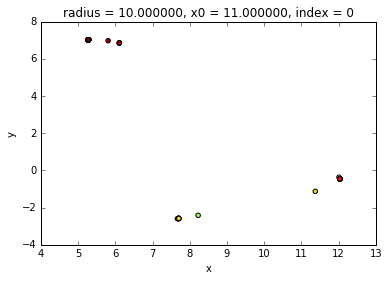

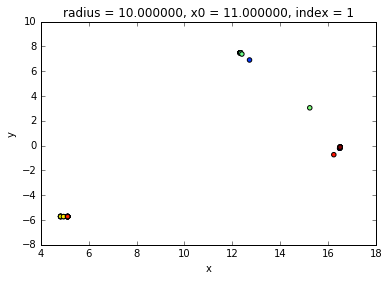

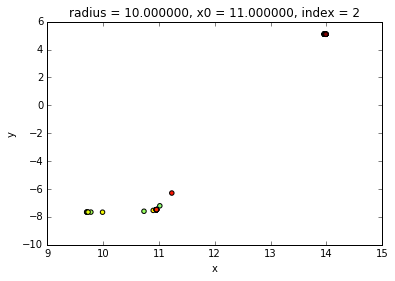

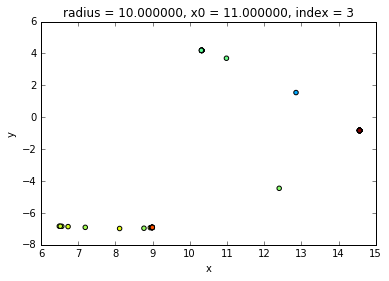

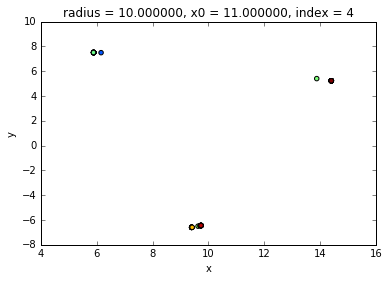

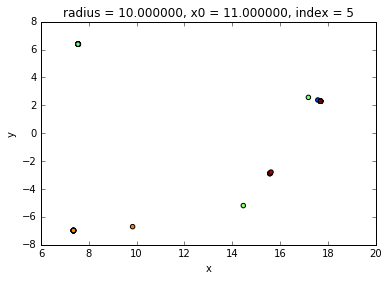

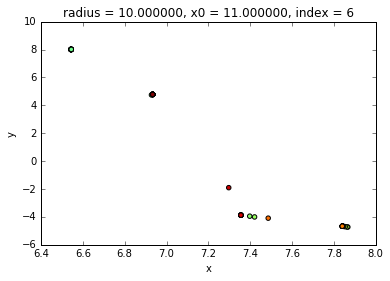

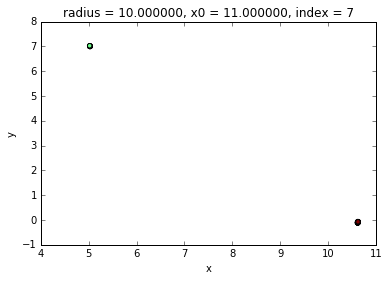

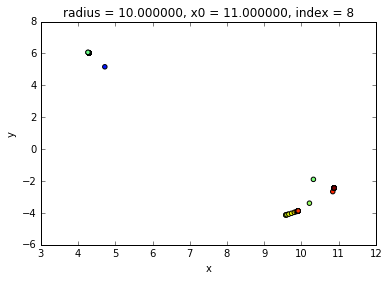

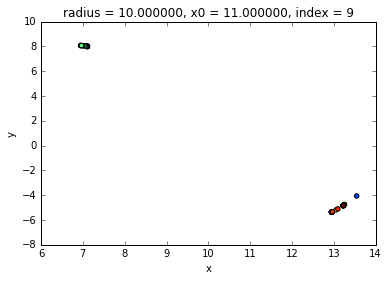

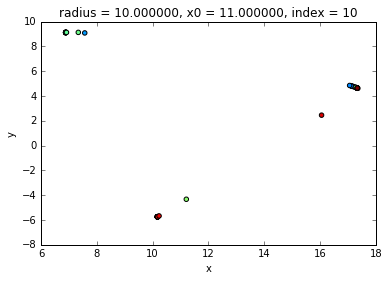

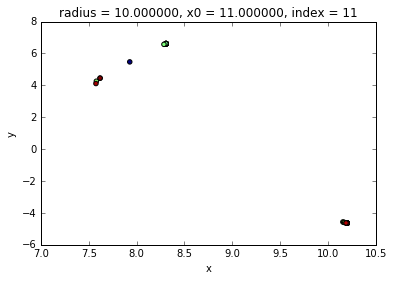

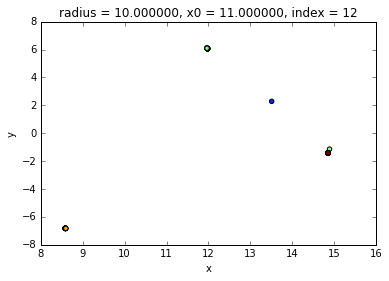

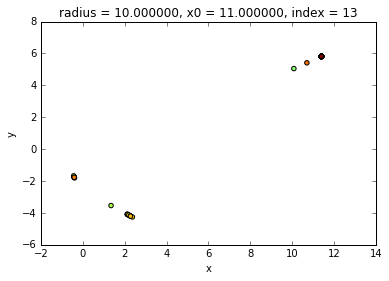

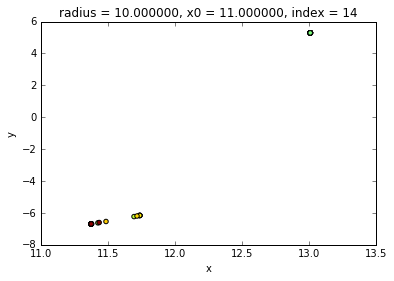

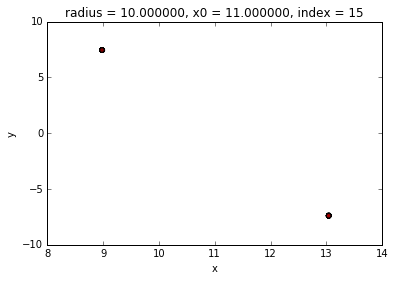

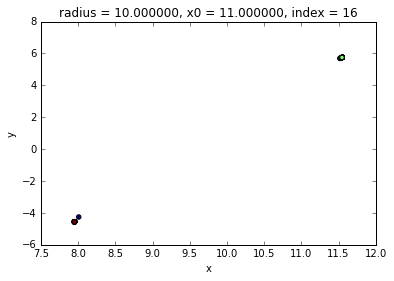

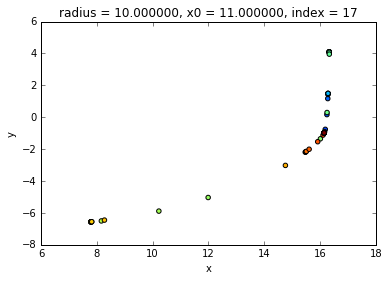

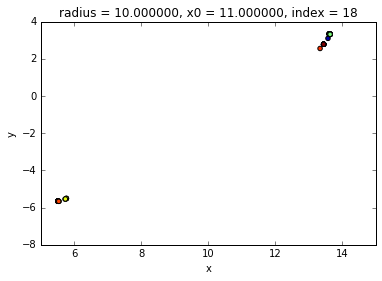

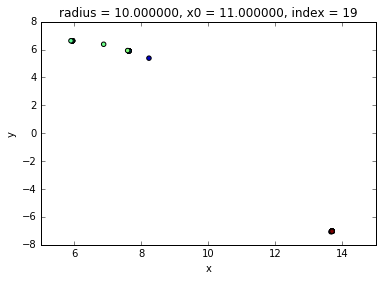

In [3]:
for index in range(20):
    a._trainer.train()
    mid_res = a.get_mid_result(data_for_training)

    mid_result_1 = [item[1] for item in mid_res]
    mid_result_3 = [item[3] for item in mid_res]
    [x, y] = zip(*mid_result_3)
    ml_angles_1 = [acos(item[0]) * np.sign(item[1]) for item in mid_result_1]
    # ml_angles_2 = [acos(item[2]) * np.sign(item[3]) for item in mid_result_1]

    fig, ax = plt.subplots()
    # (x,y) = zip(*data_for_training)
    [x, y] = zip(*mid_result_3)
    ax.scatter(x,y, c=range(len(x)))
    title_for_this_plot = "radius = %f, x0 = %f, index = %d" % (radius_1, x0, index)
    filename = str(index) + ".png"
    ax.set(xlabel="x", ylabel="y", title=title_for_this_plot)